In [2]:
import pandas as pd
import openpyxl

wb = openpyxl.load_workbook('./data/HHD_C_Report_2023Q4.xlsx',
                           data_only=True)
dfs = {
    x: pd.DataFrame(wb[x].values) for x in wb.sheetnames
    if 'Data' in x
}
dfs['Page 3 Data']
credit_df = dfs['Page 3 Data'].iloc[3:, :8]
names = credit_df.iloc[0, :].to_list()
names[0] = 'Yr:Q'
credit_df.columns = names
credit_df = credit_df.iloc[1:-5, :].set_index('Yr:Q', drop=True)
print(credit_df.to_string())

      Mortgage HE Revolving Auto Loan Credit Card Student Loan   Other      Total
Yr:Q                                                                             
03:Q1    4.942        0.242     0.641       0.688       0.2407  0.4776     7.2313
03:Q2     5.08         0.26     0.622       0.693       0.2429   0.486     7.3839
03:Q3    5.183        0.269     0.684       0.693       0.2488  0.4773     7.5551
03:Q4     5.66        0.302     0.704       0.698       0.2529  0.4486     8.0655
04:Q1     5.84        0.328      0.72       0.695       0.2598  0.4465     8.2893
04:Q2    5.967        0.367     0.743       0.697       0.2629  0.4231       8.46
04:Q3     6.21        0.426     0.751       0.706         0.33    0.41      8.833
04:Q4     6.36        0.468     0.728       0.717       0.3457  0.4229     9.0416
05:Q1    6.512        0.502     0.725        0.71       0.3636  0.3941     9.2067
05:Q2    6.696        0.528     0.774       0.717       0.3744  0.4024     9.4918
05:Q3    6.906  

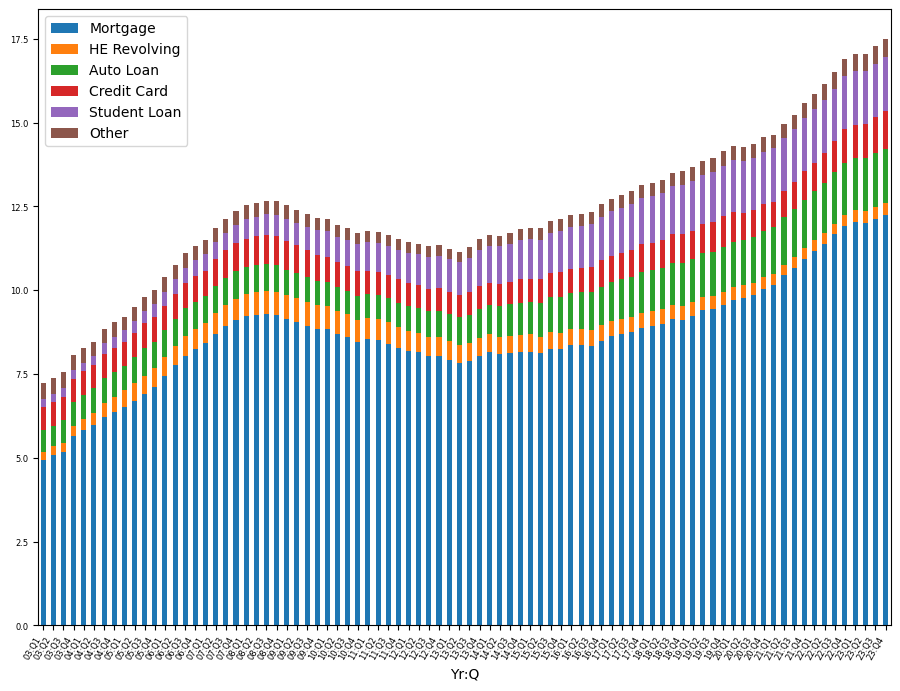

In [3]:
ax = credit_df.reset_index().iloc[:, :-1].plot(
    x='Yr:Q', kind='bar', stacked=True, figsize=(11,8),
    fontsize=6.0
)
_ = ax.set_xticks(ax.get_xticks(), labels=ax.get_xticklabels(), rotation=60, ha='right')

In [4]:
total_debt_df = credit_df.loc[:, 'Total'].to_frame()
total_debt_df.info()
total_debt_df['Delta'] = total_debt_df['Total'].pct_change()
print(total_debt_df.to_string())
print(f'Num. decreases = {total_debt_df.query("Delta < 0").shape[0]}')
print(f'Num. increases = {total_debt_df.query("Delta > 0").shape[0]}')

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 03:Q1 to 23:Q4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Total   84 non-null     object
dtypes: object(1)
memory usage: 1.3+ KB
           Total     Delta
Yr:Q                      
03:Q1     7.2313       NaN
03:Q2     7.3839  0.021103
03:Q3     7.5551  0.023186
03:Q4     8.0655  0.067557
04:Q1     8.2893  0.027748
04:Q2       8.46  0.020593
04:Q3      8.833  0.044090
04:Q4     9.0416  0.023616
05:Q1     9.2067  0.018260
05:Q2     9.4918  0.030967
05:Q3     9.7921  0.031638
05:Q4    10.0022  0.021456
06:Q1    10.3818  0.037952
06:Q2    10.7471  0.035187
06:Q3    11.1114  0.033898
06:Q4    11.3133  0.018171
07:Q1    11.4953  0.016087
07:Q2    11.8498  0.030839
07:Q3    12.1325  0.023857
07:Q4    12.3716  0.019707
08:Q1    12.5365  0.013329
08:Q2    12.5991  0.004993
08:Q3    12.6754  0.006056
08:Q4    12.6699 -0.000434
09:Q1    12.5296 -0.011073
09:Q2    12.4072 -0

          CCB   CCAB   CCL   HERB  HERAB   HERL
YY   Q                                         
2003 1  0.688  1.862  2.55  0.242   0.24  0.482
     2  0.693  1.867  2.56   0.26   0.26   0.52
     3  0.693  1.857  2.55  0.269  0.287  0.556
     4  0.698  1.872  2.57  0.302  0.297  0.599
2004 1  0.695  1.875  2.57  0.328  0.309  0.637
     2  0.697  1.903   2.6  0.367  0.326  0.693
     3  0.706  1.894   2.6  0.426  0.381  0.807
     4  0.717  2.143  2.86  0.468  0.405  0.873


<Axes: xlabel='YY'>

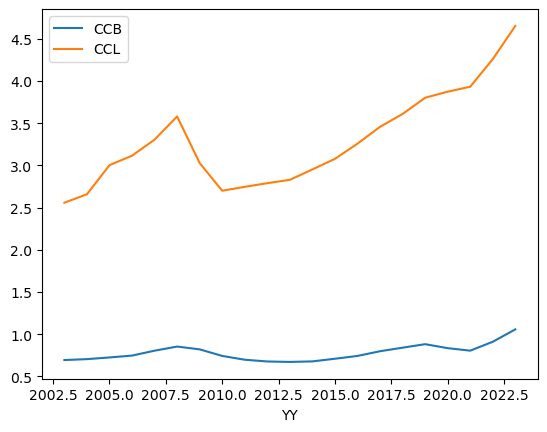

In [5]:
dfp10 = dfs['Page 10 Data']
#print(dfp10)
colnames = 'YYQ', 'CCB', 'CCAB', 'CCL', 'HERB', 'HERAB', 'HERL'
dfp10 = (
    dfp10.iloc[4:, :7].rename(columns={x: colnames[x] for x in range(7)})
         #.set_index('YYQ', drop=True)
)
dfp10.iloc[0:-1:2,4:] = dfp10.iloc[1:-1:2, 4:]
dfp10 = dfp10.iloc[0:-1:2, :]
dfp10x = pd.MultiIndex.from_tuples(
    dfp10['YYQ'].apply(lambda x: (int(x[:2]) + 2000, int(x[-1]))),
    names=['YY', 'Q']
)
dfp10 = dfp10.set_index(dfp10x).drop('YYQ', axis=1)
#dfp10['YY'] = dfp10['YYQ'].apply(lambda x: 2000 + int(x[:2]))
#dfp10['Q'] = dfp10['YYQ'].apply(lambda x: int(x[-1]))
#dfp10 = dfp10.iloc[:, 1:].set_index(['YY', 'Q'], drop=True)
print(dfp10.iloc[:8, :].to_string())
dfp10.groupby(level=0).mean().loc[:, ['CCB', 'CCL']].plot()

In [6]:
dfp12 = dfs['Page 12 Data']
#print(dfp12.iloc[:,:4].to_string())
colnames = ['YYQ'] + dfp12.iloc[3, 1:].to_list()
#print(colnames)
delinq_df = (
    dfp12.iloc[4:, :7].rename(columns={x: colnames[x] for x in range(8)})
      .set_index(
        pd.MultiIndex.from_tuples(
          dfp12.iloc[4:, 0].apply(
            lambda x: (2000 + int(x[:2]), int(x[-1]))),
            names=['YY', 'Q']
          )
       ).drop('YYQ', axis=1)
)
delinq_df

MORTGAGE HELOC  AUTO    CC STUDENT LOAN OTHER
YY   Q                                              
2003 1     1.21  0.35  2.33  8.84     6.129123  7.23
     2     1.14  0.28  2.26   8.9     6.137217  7.13
     3      1.1  0.22  2.16  8.67     6.269695  6.88
     4     1.06  0.31  2.16  9.24     6.231594  7.47
2004 1     1.01  0.21  2.32  9.27     6.336297  7.68
...         ...   ...   ...   ...          ...   ...
2022 4     0.43  0.87  3.73  7.67         0.87  7.18
2023 1     0.44  0.78  3.89  8.24         0.67  7.67
     2     0.46  0.64  3.82     8         0.63  7.56
     3      0.5  0.74  3.91  9.43         0.67  7.85
     4     0.57  0.62  4.17  9.74          0.6  7.85

[84 rows x 6 columns]

In [7]:
dfs['Page 32 Data']


,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,Total Debt Balance per Capita* by State,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Thousands of $,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,03:Q1,03:Q2,03:Q3,03:Q4,04:Q1,04:Q2,04:Q3,04:Q4,05:Q1,...,21:Q3,21:Q4,22:Q1,22:Q2,22:Q3,22:Q4,23:Q1,23:Q2,23:Q3,23:Q4
3,AZ,32.209917,33.127779,33.525335,36.171005,36.664913,38.0602,39.985962,40.716958,41.319622,...,60.54,62.13,63.9,64.06,65.65,68.87,68.05,68.37,70.35,70.35
4,CA,43.288241,44.503648,45.410817,49.202052,51.224635,52.756919,55.982586,57.68119,59.529144,...,77.21,78.53,79.94,81.36,83.06,84.85,85.09,83.33,84.05,84.96
5,FL,27.810881,28.340133,29.315227,30.988813,31.882572,33.129506,34.656831,35.501059,35.903751,...,50.7,52.6,53.01,54.19,55.34,57.07,57.63,57.55,58.61,60.04
6,IL,32.217616,33.107767,33.39687,36.093312,36.800401,37.33642,38.654618,39.507667,40.04427,...,49.35,50.45,50.8,50.71,51.33,53.09,53.77,53.24,53.73,53.49
7,MI,30.544587,30.945757,31.709399,33.273203,34.188676,35.131788,36.206465,36.863928,36.76231,...,41.2,42.57,43.56,44.13,44.37,45.67,46.13,45.25,46.68,46.28
8,NJ,35.664897,35.917164,36.77814,39.744251,41.496737,42.63117,44.510601,45.288489,45.690027,...,61.63,62.09,62.25,63.09,63.91,65.42,65.51,64.83,64.82,64.88
9,NV,38.015996,38.406056,38.523861,42.548754,43.475268,44.649934,46.475284,50.757963,52.370224,...,59.94,61.23,59.99,61.49,63.33,66.93,67.67,66.92,69.29,68.45
